In [1]:
#Plot
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Data Packages
import math
import pandas as pd
import numpy as np

#Progress bar
from tqdm import tqdm

#Counter
from collections import Counter

# Machine Learning
import sklearn.metrics as metrics

#Operation
import operator

#Natural Language Processing Packages
import re
import nltk

## Download Resources
nltk.download("stopwords")
nltk.download("averaged_perceptron_tagger")
nltk.download("wordnet")
nltk.download('punkt')

from nltk.tokenize import word_tokenize, wordpunct_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

from IPython.display import display

%pip install svgling
%pip install datasets

pd.options.mode.chained_assignment = None

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
from datasets import load_dataset

babe_dataset = load_dataset("mediabiasgroup/BABE-v3")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [3]:
# convert to df
babe_df = pd.DataFrame(babe_dataset['train'])
babe_df_cleaned = babe_df[['text', 'topic']]

babe_df_cleaned.loc[:, 'topic'] = babe_df_cleaned.loc[:, 'topic'].apply(lambda x: " ".join(x.split("-")))

# print number of unique topics
print("Number of unique topics:", len(babe_df_cleaned['topic'].unique()))

babe_df_cleaned.head()

Number of unique topics: 22


,text,topic
0,But instead of closing loopholes that allow cr...,gun control
1,"""You think I'm joking,"" he continued. """,blm
2,"Yes, the rich are rich and want to stay that w...",taxes
3,Americans are carrying $1.57 trillion in outst...,student debt
4,Republican state legislators from Texas to Ari...,gun control


# Q1

In [4]:
def make_tokens(df: pd.DataFrame) -> pd.DataFrame:
  ## Your code starts here ##
  tokens = []
  df['tokens'] = df['text'].apply(lambda text: word_tokenize(text.lower()))
  ## end ##
  return df

In [5]:
babe_df_cleaned = make_tokens(babe_df_cleaned)
print(babe_df_cleaned.loc[0, 'tokens'])

['but', 'instead', 'of', 'closing', 'loopholes', 'that', 'allow', 'criminals', 'to', 'access', 'firearms', ',', 'the', 'bill', 'by', 'house', 'democrats', 'could', 'turn', 'millions', 'of', 'law-abiding', 'american', 'gun', 'owners', 'into', 'felons', '.']


# Q2

In [6]:
def clean_tokens(df: pd.DataFrame) -> pd.DataFrame:
  ## Your code starts here ##
  ## Removing all stop words and punctuation from the tokens in the ‘tokens’ columns

 #set stopwords and custom punctuation
  stop_words = set(stopwords.words("english"))
  punctuation = set("!”#$%&’()*+,-./:;<=>?@[\\]^_`{|}~")

#create list to store cleaned version of tokens
  cleaned_tokens =[]

  for word in df['tokens'].iloc[0]:
    if word not in punctuation and word.lower() not in stop_words:
      cleaned_tokens.append(word)
#replace old uncleaned version with cleaned_tokens
  df['tokens'].iloc[0] = cleaned_tokens

  ## end ##
  return df

In [7]:
babe_df_cleaned = clean_tokens(babe_df_cleaned)
print(babe_df_cleaned['tokens'].iloc[0])


['instead', 'closing', 'loopholes', 'allow', 'criminals', 'access', 'firearms', 'bill', 'house', 'democrats', 'could', 'turn', 'millions', 'law-abiding', 'american', 'gun', 'owners', 'felons']


# Q3



In [8]:
def stem_tokens(df: pd.DataFrame) -> pd.DataFrame:
  ## Your code starts here ##

  #import snowball stemmer
  stemmer = SnowballStemmer("english")
  stop_words = set(stopwords.words("english"))

  babe_df_cleaned['tokens_stemmed'] = babe_df_cleaned['tokens'].apply(lambda tokens: [stemmer.stem(word) for word in tokens if word.lower() not in stop_words])

  ## end ##
  return df

In [9]:
babe_df_cleaned = stem_tokens(babe_df_cleaned)
print(babe_df_cleaned['tokens_stemmed'].iloc[0])

['instead', 'close', 'loophol', 'allow', 'crimin', 'access', 'firearm', 'bill', 'hous', 'democrat', 'could', 'turn', 'million', 'law-abid', 'american', 'gun', 'owner', 'felon']


# Q4

## (a)

<Axes: title={'center': 'Zipf Plot'}, xlabel='Tokens', ylabel='Frequency'>

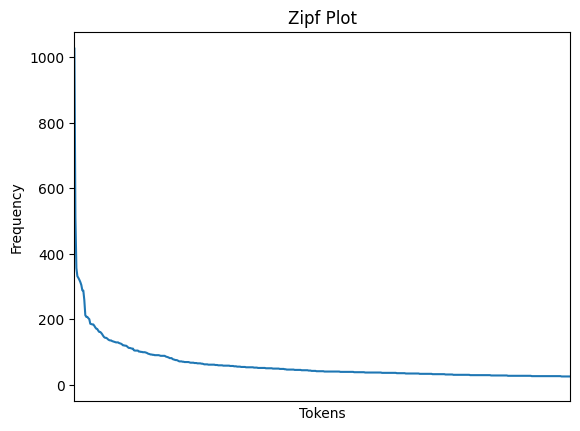

In [10]:
## Your code starts here ##

#set stopwords
stop_words = set(stopwords.words("english"))

#frequency of each token
token_count_ng = Counter()

# remove punctuation
babe_df_cleaned['tokens'] = babe_df_cleaned['tokens'].apply(lambda x: [word for word in x if word.isalpha()])
# create no stopwords column
babe_df_cleaned['tokens_nsp'] = babe_df_cleaned['tokens'].apply(lambda x: [word for word in x if word not in stop_words])

for words in babe_df_cleaned['tokens_nsp']:
  token_count_ng.update(words)

  word_freq_nsp = pd.DataFrame.from_dict(token_count_ng, orient='index', columns=['Frequency']).sort_values(by='Frequency', ascending=False)
word_freq_nsp.head()

ax = word_freq_nsp.plot(legend=False, xlabel='Tokens', ylabel='Frequency', title="Zipf Plot")
ax.set_xticks([])
ax.set_xlim(0, 500)
ax


## end ##

Enter answer here:Zipf distribution

## (b)

In [11]:
## Your code starts here ##
#DataFrame showing the top 10 words by frequency.



print(word_freq_nsp.head(10))


## end ##

             Frequency
trump             1027
president          512
said               357
people             332
would              327
new                321
donald             314
white              305
police             289
coronavirus        288


# Q5

## (a)

In [12]:
# get Top K mutual information terms from the dataframe
def getMI(topk, df, label_column='topic'):
    unique_labels = df[label_column].unique()

    # create a placeholder df
    overallDf = pd.DataFrame()

    # loop through each topic
    for topic in unique_labels:
      miScore = []

      # create a binary column for the current topic
      label_col = df[label_column].copy()
      label_col[label_col != topic] = 0
      label_col[label_col == topic] = 1

      # get the mi score for each word with the current topic
      for word in topk:
          miScore.append([word[1]]+[metrics.mutual_info_score(label_col, df[word[1]])] + [topic])

      # combine the scores of all words for the topic into the df
      miScoredf = pd.DataFrame(miScore).sort_values(1,ascending=0)
      miScoredf.columns = ['Word','MI Score','Topic']
      overallDf = pd.concat([overallDf, miScoredf])

    return overallDf

In [13]:
## Your code starts here ##

#top 500 words by frequency
word_freq_nsp['token'] = word_freq_nsp.index
topk = [tuple(x) for x in word_freq_nsp.head(500).to_numpy()]

# create a binary list for each row in the dataset to indicate if it contains
# each word in the top 500
freqText = []
for entry in babe_df_cleaned['tokens']:
    tempCounter = Counter(entry)
    topkinText = [1 if tempCounter[word] > 0 else 0 for (wordCount,word) in topk]
    freqText.append(topkinText)

# Turn these lists into a DataFrame
freqTextDf = pd.DataFrame(freqText)
dfName = []
for c in topk:
    dfName.append(c[1])
freqTextDf.columns = dfName

# Merge DataFrame with dataset DataFrame
finalTextDf = babe_df_cleaned[['text','topic']].join(freqTextDf)

mi_scores = getMI(topk, finalTextDf)

# show top 10 words for each topic
mi_scores = mi_scores.set_index(['Word']).groupby('Topic')['MI Score'].nlargest(10).reset_index()
mi_scores
## end ##

,Topic,Word,MI Score
0,#metoo,sexual,0.007047
1,#metoo,women,0.003511
2,#metoo,trump,0.001809
3,#metoo,business,0.001152
4,#metoo,accused,0.001135
...,...,...,...
215,white nationalism,police,0.001917
216,white nationalism,biden,0.001917
217,white nationalism,culture,0.001852
218,white nationalism,would,0.001767


## (b)

In [19]:
## Your code starts here ##
#set stopwords
stop_words = set(stopwords.words("english"))

# remove punctuation
babe_df_cleaned['tokens_stemmed'] = babe_df_cleaned['tokens_stemmed'].apply(lambda x: [word for word in x if word.isalpha()])
# create no stopwords column
babe_df_cleaned['tokens_stemmed_nsp'] = babe_df_cleaned['tokens_stemmed'].apply(lambda x: [word for word in x if word not in stop_words])

#frequency of each token
token_count_2 = Counter()

for token2 in babe_df_cleaned['tokens_stemmed_nsp']:
  token_count_2.update(token2)

word_freq_nsp2 = pd.DataFrame.from_dict(token_count_2, orient='index', columns=['Frequency']).sort_values(by='Frequency', ascending=False)

#top 500 words by frequency
word_freq_nsp2['tokens_stemmed_nsp'] = word_freq_nsp2.index
topk2 = [tuple(x) for x in word_freq_nsp2.head(500).to_numpy()]

# create a binary list for each row in the dataset to indicate if it contains
# each word in the top 500
freqText2 = []
for token in babe_df_cleaned['tokens_stemmed_nsp']:
    tempCounter2 = Counter(token)
    topkinText2 = [1 if tempCounter2[word] > 0 else 0 for (wordCount,word) in topk2]
    freqText2.append(topkinText2)

# Turn these lists into a DataFrame
freqTextDf2 = pd.DataFrame(freqText2)
dfName2 = []
for d in topk2:
    dfName2.append(d[1])
freqTextDf2.columns = dfName2

# Merge DataFrame with dataset DataFrame
finalTextDf2 = babe_df_cleaned[['text','topic']].join(freqTextDf2)

mi_scores2 = getMI(topk2, finalTextDf2)

# show top 10 words for each topic
mi_scores2 = mi_scores2.set_index(['Word']).groupby('Topic')['MI Score'].nlargest(10).reset_index()
mi_scores2

## end ##

,Topic,Word,MI Score
0,#metoo,sexual,0.007472
1,#metoo,women,0.003511
2,#metoo,accus,0.001918
3,#metoo,trump,0.001823
4,#metoo,charg,0.001705
...,...,...,...
215,white nationalism,christian,0.002106
216,white nationalism,polic,0.001999
217,white nationalism,tax,0.001928
218,white nationalism,biden,0.001917


## (c)


Enter answer here:
The MI score helps us understand the degree of association between two variables, indicating the amount of information gained about one variable by observing the other, in this case each topics and tokens. Table 5a is more useful because they tell us more information about which topic the text is about.